In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def rk4_step(func, x, y, h):
    
    k1 = h*func(x,y) #get the sloped at initial point
    k2 = h*func(x+h/2, y+k1/2) # use the slope to get to the midpoint, and get a new slope
    k3 = h*func(x+h/2, y+k2/2) # use the slope to reevaluate the midpoint, and get a new slope
    k4 = h*func(x+h, y+k3) # use the slope to evaluate y at endpoint and get a new slope at endpoint
    ynew = y + k1/6 + k2/3 + k3/3 + k4/6
    return ynew

In [5]:
def rk4_stepd(func, x, y, h):

    
    #### for stepsize h ####
        
    H = h
    
    k1 = H*func(x,y)              # first function evaluation will be common for both h and h/2
    k2 = H*func(x+H/2, y+k1/2)
    k3 = H*func(x+H/2, y+k2/2)
    k4 = H*func(x+H, y+k3)
    ynew1 = y + k1/6 + k2/3 + k3/3 + k4/6
    
    #### for stepsize h/2 ####
    H = h/2
    
    k1 = k1/2
    k2 = H*func(x+H/2, y+k1/2)
    k3 = H*func(x+H/2, y+k2/2)
    k4 = H*func(x+H, y+k3)
    ymid = y + k1/6 + k2/3 + k3/3 + k4/6     # we have just gotten to ymid = y(x+h/2). gotta repeat to get to y(x+h)
    
    x = x + h/2
    y = ymid
    k1 = H*func(x,y)
    k2 = H*func(x+H/2, y+k1/2)
    k3 = H*func(x+H/2, y+k2/2)
    k4 = H*func(x+H, y+k3)
    ynew2 = y + k1/6 + k2/3 + k3/3 + k4/6
    
    # as shown in Github readme, we can sneak one more order of accuracy by being cunning
    
    ####--------- -------imp note--------------------- ####
    # ynew2-ynew1 ~ O(h^5) ~ error estimate of RK4 method #
    # can be used to make step size adaptive              #
    #-----------------------------------------------------#
    
    
    yfin = (16*ynew2-ynew1)/15
    
    return yfin
    
    

In [6]:
def solve(func, y0, x_arr, stepper):
    # x_arr[0] should be x0
    h = x_arr[1] - x_arr[0]
    print("step size is ",h)
    y_arr = np.zeros(x_arr.shape)
    y_arr[0] = y0
    for i in range(0,len(x_arr)-1):
        y_arr[i+1] = stepper(func, x_arr[i], y_arr[i], h)
    
    return y_arr

In [7]:
dydx = lambda x, y: y/(1+x**2)

In [24]:
xvals = np.linspace(-20,20,74)

In [25]:
c0 = 1/(np.exp(np.arctan(-20)))
y = lambda x: c0*np.exp(np.arctan(x))
y_true = y(xvals)

In [26]:
y_est = solve(dydx,1,xvals,rk4_stepd)

step size is  0.5479452054794507


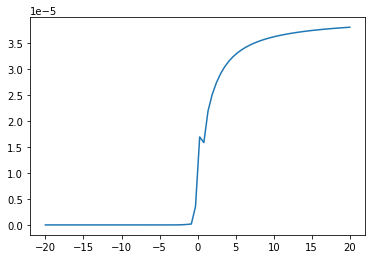

In [27]:
plt.plot(xvals, np.abs(y_true-y_est))


In [57]:
0.2**6

6.400000000000002e-05

In [17]:
=

0.0